In [1]:
pip install scikit-learn

     |████████████████████████████████| 22.2 MB 1.1 MB/s             
     |████████████████████████████████| 309 kB 54.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
def load_dataset():
    # Load the dataset using pandas read_csv() function
    VisaForLisa_dataset = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')  # 'Visa_For_Lisa_Loan_Modelling.csv' is file path
    
    # Return the DataFrame
    return VisaForLisa_dataset

# Load the dataset into a DataFrame
VisaForLisa_dataframe = load_dataset()

# Print the first few rows of the DataFrame
print(VisaForLisa_dataframe.head())


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
def print_summarize_dataset(dataset):
   # Print dataset dimension
   print("Dataset dimension:")
   print(dataset.shape)
   
   # Print first 10 rows of dataset
   print("First 10 rows of dataset:")
   print(dataset.head(10))
   
   # Print statistical summary
   print("Statistical summary:")
   print(dataset.describe())

# Call the function with the VisaForLisa_dataframe dataset
print_summarize_dataset(VisaForLisa_dataframe)


Dataset dimension:
(5000, 14)
First 10 rows of dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  Credi

In [5]:
def clean_dataset(VisaForLisa_dataframe):
    # Drop rows with missing values
    cleaned_dataframe = VisaForLisa_dataframe.dropna()

    # Return the cleaned DataFrame
    return cleaned_dataframe

# Load the dataset into a DataFrame
VisaForLisa_dataframe = load_dataset()

# Clean the dataset
cleaned_dataframe = clean_dataset(VisaForLisa_dataframe)

# Verify the result
print(cleaned_dataframe.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# LOOKING FOR CORRELATIONS

In [6]:
print("Column names:", VisaForLisa_dataframe.columns)

Column names: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


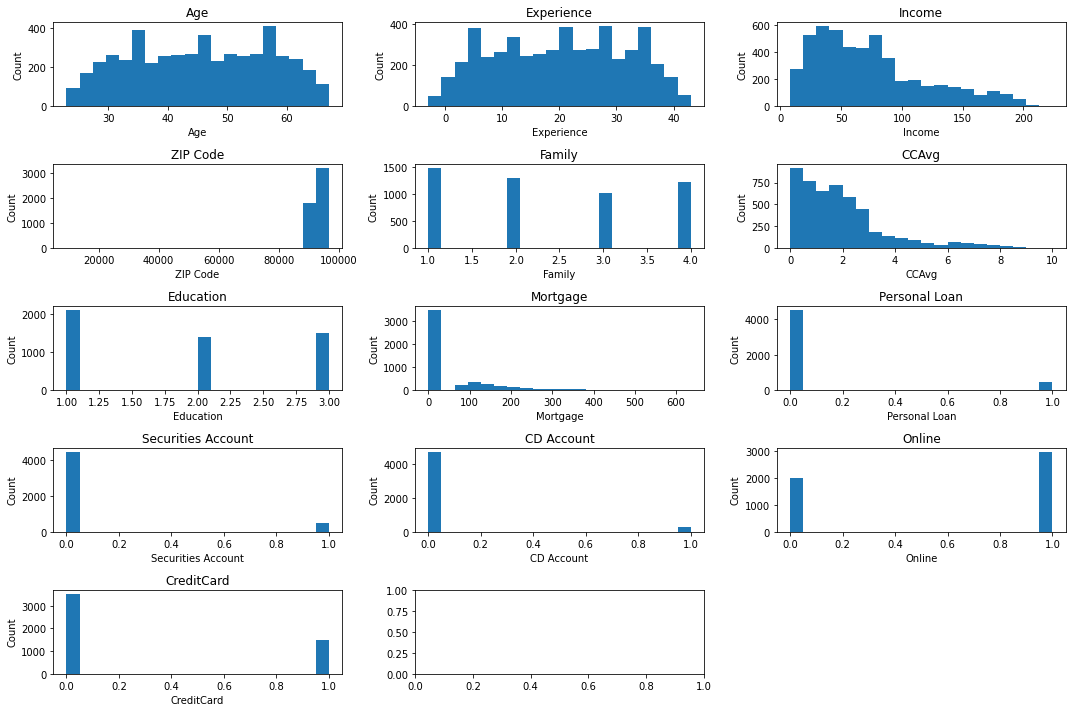

In [7]:
def print_histograms(dataset):
    # Get the numerical columns
    numerical_cols = ['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

    # Create subplots
    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
    axs = axs.flatten()

    # Plot histograms for numerical columns
    for i, col in enumerate(numerical_cols):
        axs[i].hist(dataset[col], bins=20)
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')

    # Hide the last subplot
    axs[-1].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

print_histograms(cleaned_dataframe)


In [8]:
def compute_correlations_matrix(VisaForLisa_dataframe):
    correlations = VisaForLisa_dataframe.corr(method='pearson')
    return correlations

correlations = compute_correlations_matrix(VisaForLisa_dataframe)

print(correlations['Personal Loan']  )


ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64


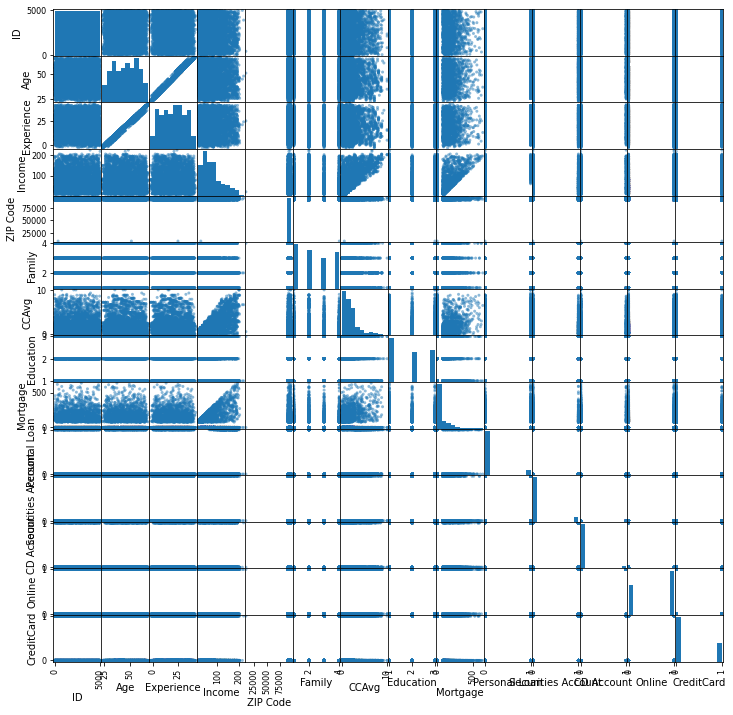

In [9]:
def print_scatter_matrix(VisaForLisa_dataframe):
    pd.plotting.scatter_matrix(VisaForLisa_dataframe, figsize=(12, 12))
    plt.show()

# Load the dataset into a DataFrame
VisaForLisa_dataframe = load_dataset()

# Print scatter matrix
print_scatter_matrix(VisaForLisa_dataframe)

In [10]:
def compute_correlations_matrix(VisaForLisa_dataframe):
    correlations = VisaForLisa_dataframe.corr(method='pearson')
    return correlations

correlations = compute_correlations_matrix(VisaForLisa_dataframe)

print(correlations['Experience'])

# correlations = VisaForLisa_dataframe.corr()
# Experience_correlations = correlations['Experience'].drop('Experience')
# most_correlated_attributes = Experience_correlations.abs().nlargest(4) 
# print(most_correlated_attributes)


ID                   -0.008326
Age                   0.994215
Experience            1.000000
Income               -0.046574
ZIP Code             -0.028626
Family               -0.052563
CCAvg                -0.050077
Education             0.013152
Mortgage             -0.010582
Personal Loan        -0.007413
Securities Account   -0.001232
CD Account            0.010353
Online                0.013898
CreditCard            0.008967
Name: Experience, dtype: float64


In [11]:
def compute_correlations_matrix(VisaForLisa_dataframe):
    correlations = VisaForLisa_dataframe.corr(method='pearson')
    return correlations

correlations = compute_correlations_matrix(VisaForLisa_dataframe)

print(correlations['Income'])

# correlations = VisaForLisa_dataframe.corr()
# Income_correlations = correlations['Income'].drop('Income')
# most_correlated_attributes = Income_correlations.abs().nlargest(4) 
# print(most_correlated_attributes)


ID                   -0.017695
Age                  -0.055269
Experience           -0.046574
Income                1.000000
ZIP Code             -0.016410
Family               -0.157501
CCAvg                 0.645984
Education            -0.187524
Mortgage              0.206806
Personal Loan         0.502462
Securities Account   -0.002616
CD Account            0.169738
Online                0.014206
CreditCard           -0.002385
Name: Income, dtype: float64


# PREDITIONS

In [12]:

def logistic_regression_model(data):
    # Split the data into features (X) and target variable (y)
    X = data.drop(['Personal Loan'], axis=1)
    y = data['Personal Loan']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the logistic regression model
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return the trained model
    return model

# Assuming VisaForLisa_dataframe is the preprocessed DataFrame with features and the 'Personal Loan' target variable
logistic_regression_model = logistic_regression_model(VisaForLisa_dataframe)


Accuracy: 0.908
Precision: 0.6274509803921569
Recall: 0.3047619047619048
F1 Score: 0.4102564102564103


In [13]:
# Separate the features (X) and target variable (y)
X = VisaForLisa_dataframe.drop('Personal Loan', axis=1)
y = VisaForLisa_dataframe['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.992
Precision: 0.98989898989899
Recall: 0.9333333333333333
F1 Score: 0.9607843137254903
